In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from os import listdir
from io import StringIO
import pickle
import datetime
import math
import sys
sys.path.insert(0, 'C:/Users/Betsy/Documents/TCD/cmevo/functions')
import cme_graphing


First, the relevent CMEs are imported.  The CMEs have to be from 1996 to 2004 and have at least 11 height-time points.  In the paper, there were 3,463 CMEs analysed, but when I filtered using the criteria mentioned only 2,845 CMEs were grabbed


In [2]:
#Our parameters for the data
#Must be between 1994 and 2004
min_year = datetime.datetime(1996,1,1,0,0,0)
max_year = datetime.datetime(2004,12,31,23,59,59)

#Must have at least 11 height-time points
min_ht = 11

#First, create the array of relevant cmes
cme=[]

#Second, create the lists for those two days where we will store their values
cme=cme_graphing.find_file(min_year, max_year, min_ht)
print (len(cme))

2845


Below, all 2845 CMEs have their velocity vs time and height vs time graphs plotted.  I have to display them using the "plt.show()" command because when I tried running the code with that line commented, the graphs that were being saved to the files were completely misaligned and inaccurate.
There are 5,690 height vs. time graphs; each CME has one in km and one in Rsun
There are 2,845 velocity vs. time graphs.

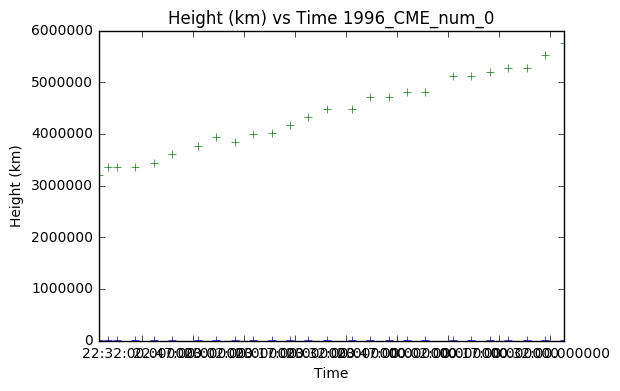

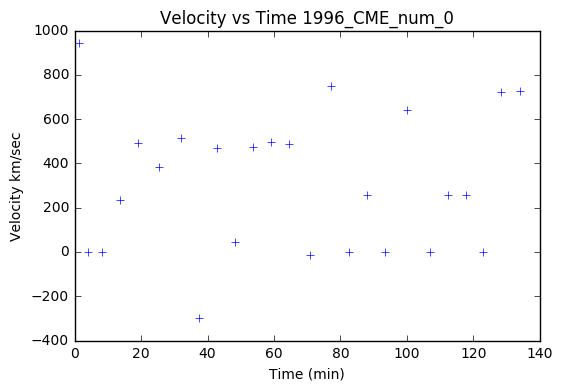

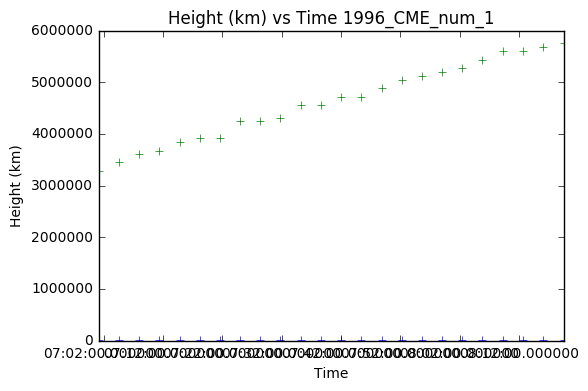

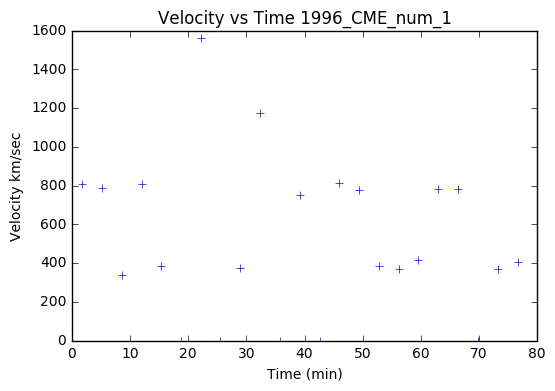

In [3]:
x=0
while (x<len(cme)):
    day=cme[x]['DATE_TIME'][0]
    #Height vs Time
    cme_graphing.height_graphs(cme[x]['DATE_TIME'], cme[x]['HEIGHT'], str(day.year)+'_CME_num_'+str(x))

    #Velocity vs Time
    x1=cme_graphing.format_nstime(cme[x]['DATE_TIME'])
    y1=cme_graphing.get_derivative(cme[x]['HEIGHT']*695000, cme[x]['DATE_TIME'])
    cme_graphing.velocity_graphs(x1, y1, str(day.year)+'_CME_num_'+str(x))
    
    x+=1

In [ ]:

#Second, scan the files for the right dates and time
day=[]
with open('../all_cmes.pkl', 'rb') as f:
    data = pickle.load(f)
ht_data=data['HT_DATA']

x=0
while (x<len(ht_data)):
    #Check that its within the date rang
    if (ht_data[x]['DATE_TIME'][0]<max_year) and (len(ht_data[x]['HEIGHT'])>=min_ht):
        cme.append(ht_data[x])
    x+=1